- Model single model - use categorical and continuous 
    - see whether that weird inverse relationship still is there. 
    - See whether gain/loss/shock asymmetry still exists in these models. 


In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [35]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import NoBrainer_Analysis_AllinOne
imp.reload( NoBrainer_Analysis_AllinOne)
from  NoBrainer_Analysis_AllinOne import *

import Correlation_bw_triplets
imp.reload( Correlation_bw_triplets)
from  Correlation_bw_triplets import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

from Exclusion import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *


In [36]:
# We don't actually need no brainers for this analysis - I'm excluding manually. 
# for gain/loss
#vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
# for shock
#vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
#df_nobrainer = all_subs_no_brainer(vp_list,'shock')
#df_nobrainer.head()

### Fitting a single subject

- ** need to add shock to this model ** 

In [37]:
# loading data
task = 'shock'
task = 'gain'
df = load_single_subject('12',task=task)

# key-word arguments
kwargs = {}  
kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
#kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']
#kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
kwargs['task']=task

# fitting model 
out = fit_model_singRL(df,**kwargs)
out['results'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:                  0.2777
Time:                        14:28:55   Log-Likelihood:                -75.095
converged:                       True   LL-Null:                       -103.96
                                        LLR p-value:                 1.796e-12
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
intercept_r              -0.0143      0.201     -0.071      0.943        -0.408     0.380
mag_diff_rl               0.6161      0.265      2.321      0.020         0.096     1.136
prob_diff_rl              1.6045      0.309      5.194      0.000         0.999     2.210
ambig_present_diff_rl    -0.9460      0.225     -4.212      0.000        -1.386    -0.506
=========================================================================================
"""

## Fitting all subjects

### Model 1 - Ambiguity Presence

In [58]:
kwargs = {}
#kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
#kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

# for gain
kwargs['task']='gain'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
model_summary_df_g, model_param_df_g=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# for loss
kwargs['task']='loss'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# for shock
kwargs['task']='shock'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# stacking all the df's for a single model 
model_ap_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
model_ap_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))


### Model 2 - Level of Ambiguity

In [59]:
kwargs = {}
#kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
#kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

# for gain
kwargs['task']='gain'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
model_summary_df_g, model_param_df_g=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# for loss
kwargs['task']='loss'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# for shock
kwargs['task']='shock'
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs)

# stacking all the df's for a single model 
model_al_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
model_al_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))



### Drop bad subjects & reverse beta

In [61]:
model_ap_param_df = exclude_subjects_manually(model_ap_param_df)
model_al_param_df = exclude_subjects_manually(model_al_param_df)

model_ap_summary_df= exclude_subjects_manually(model_ap_summary_df)
model_al_summary_df= exclude_subjects_manually(model_al_summary_df)

In [62]:
# reverse beta parameters for shock and loss to match gain
def reverseBeta(model_param_df):
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    return(model_param_df)

In [63]:
model_ap_param_df = reverseBeta(model_ap_param_df)
model_al_param_df = reverseBeta(model_al_param_df)

### Bar Plots to see if we still get different ambiguity parameters for gain/loss/shock

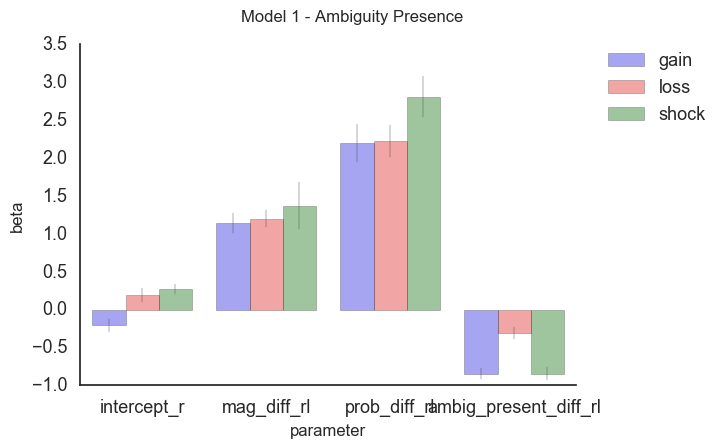

In [64]:
model_ap_param_df['condition']=model_ap_param_df['task']
fig = plot_params_bar(model_ap_param_df,order=['gain','loss','shock'], suptitle = 'Model 1 - Ambiguity Presence')
### ambiguity present

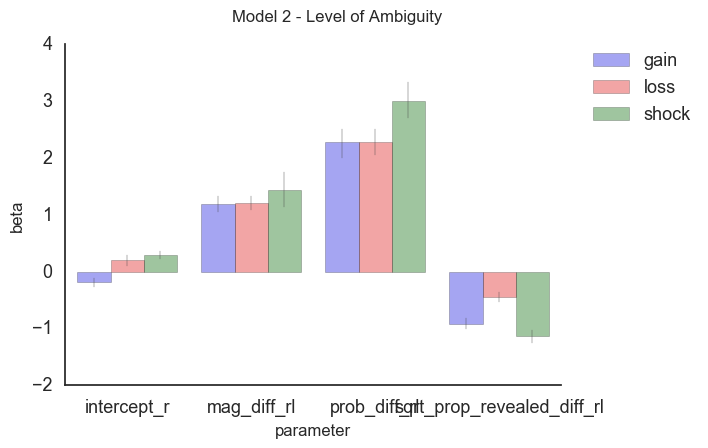

In [65]:
model_al_param_df['condition']=model_al_param_df['task']
fig = plot_params_bar(model_al_param_df,order=['gain','loss','shock'], suptitle = 'Model 2 - Level of Ambiguity')
### ambiguity level

### Plotting Scatter Plots to see if weird correlations still exist

In [66]:
#change MIDs to match between gainloss and shock versions
model_ap_param_df.MID = model_ap_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_al_param_df.MID = model_al_param_df.MID.apply(lambda x: x.replace('_2', ''))

In [67]:

def triplet(model_param_df_merged, parameter):

        b1 = model_param_df_merged.loc[(model_param_df_merged.parameter==parameter)&
                                            (model_param_df_merged.task=='gain'),['MID','beta', "se"]]

        b2 = model_param_df_merged.loc[(model_param_df_merged.parameter==parameter)&
                                            (model_param_df_merged.task=='loss'),['MID','beta', 'se']]

        b3 = model_param_df_merged.loc[(model_param_df_merged.parameter==parameter)&
                                            (model_param_df_merged.task=='shock'),['MID','beta', 'se']]

        triplet_df= b1.merge(b2,on='MID',how='outer').merge(b3,on='MID',how='outer')
        triplet_df.columns=['MID','gain', 'se_gain','loss', 'se_loss','shock', 'se_shock']

        return(triplet_df)


In [76]:
def plotTriplet(triplet_df, parameter):
    #yerr = triplet_df['se_shock'].as_matrix()
    #xerr = triplet_df['se_gain'].as_matrix()
    fig,axes = plt.subplots(1,3,figsize=(12,4),sharey=True,sharex=True)
    axes[0].scatter(triplet_df['gain'],triplet_df['shock'])
    #axes[0].errorbar(triplet_df['gain'],triplet_df['shock'], xerr=xerr, yerr=yerr)
    axes[0].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[0].plot([0, 1], [0, 1], transform=axes[0].transAxes, linewidth = 0.5)


    axes[0].set_xlabel('beta(gain)')
    axes[0].set_ylabel('beta(shock)')
    r,p=spearmanr(triplet_df['gain'],triplet_df['shock'])
    axes[0].set_title('gain/shock r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    #axes[0].set_xlim([-4,4])
    #axes[0].set_ylim([-4,4])
    axes[0].set_aspect('equal')

    axes[1].scatter(triplet_df['gain'],triplet_df['loss'])
    axes[1].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes, linewidth = 0.5)

    axes[1].set_xlabel('beta(gain)')
    axes[1].set_ylabel('beta(loss)')
    r,p=spearmanr(triplet_df['gain'],triplet_df['loss'])
    axes[1].set_title('gain/loss r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    axes[1].set_aspect('equal')

    axes[2].scatter(triplet_df['shock'],triplet_df['loss'])
    axes[2].axhline(y=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[2].axvline(x=0.000,c="blue",linewidth=0.5,zorder=0)
    axes[2].plot([0, 1], [0, 1], transform=axes[2].transAxes, linewidth = 0.5)

    axes[2].set_xlabel('beta(shock)')
    axes[2].set_ylabel('beta(loss)')
    r,p=spearmanr(triplet_df['shock'],triplet_df['loss'])
    axes[2].set_title('shock/loss r={0} p={1}'.format(np.round(r,2),np.round(p,2)))
    axes[2].set_aspect('equal')
    sns.despine()

    fig.suptitle(parameter)
    fig.subplots_adjust(top=0.77)

    return(fig)

In [77]:
triplet_ap_intercept = triplet(model_ap_param_df, parameter='intercept_r')
triplet_ap_magdiff = triplet(model_ap_param_df, parameter='mag_diff_rl')
triplet_ap_probdiff = triplet(model_ap_param_df, parameter='prob_diff_rl')
triplet_ap_ambipresent = triplet(model_ap_param_df, parameter='ambig_present_diff_rl')

In [78]:
triplet_al_intercept = triplet(model_al_param_df, parameter='intercept_r')
triplet_al_magdiff = triplet(model_al_param_df, parameter='mag_diff_rl')
triplet_al_probdiff = triplet(model_al_param_df, parameter='prob_diff_rl')
triplet_al_ambiLevel = triplet(model_al_param_df, parameter='sqrt_prop_revealed_diff_rl')

### Intercept

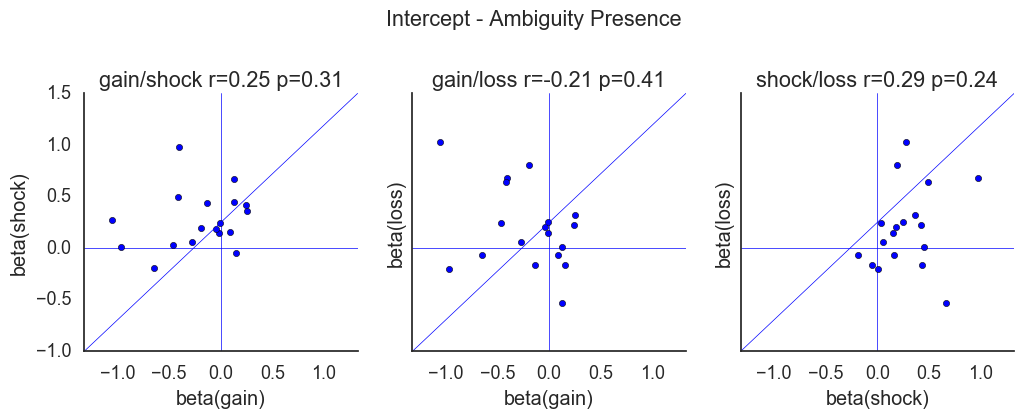

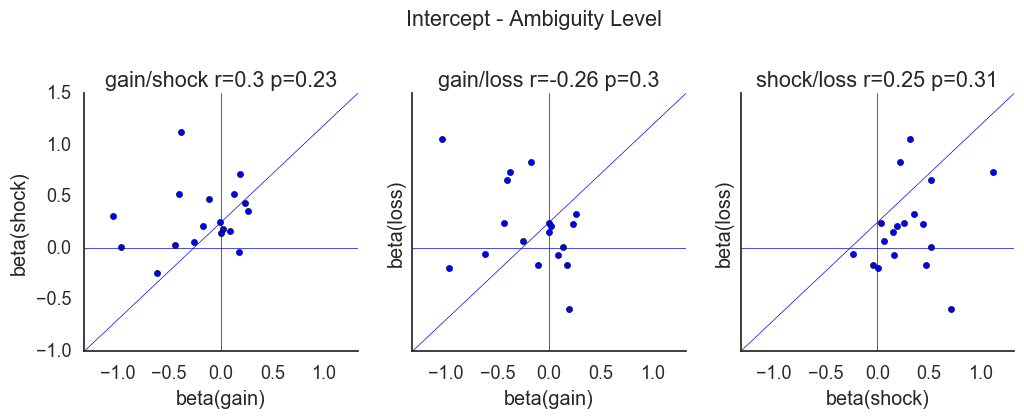

In [79]:
plotTriplet(triplet_ap_intercept, 'Intercept - Ambiguity Presence')
f = plotTriplet(triplet_al_intercept, 'Intercept - Ambiguity Level')

### Magnitude Difference

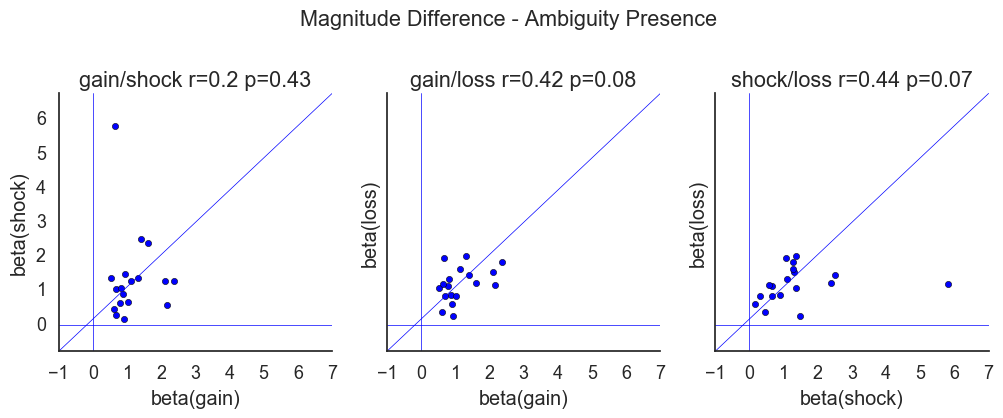

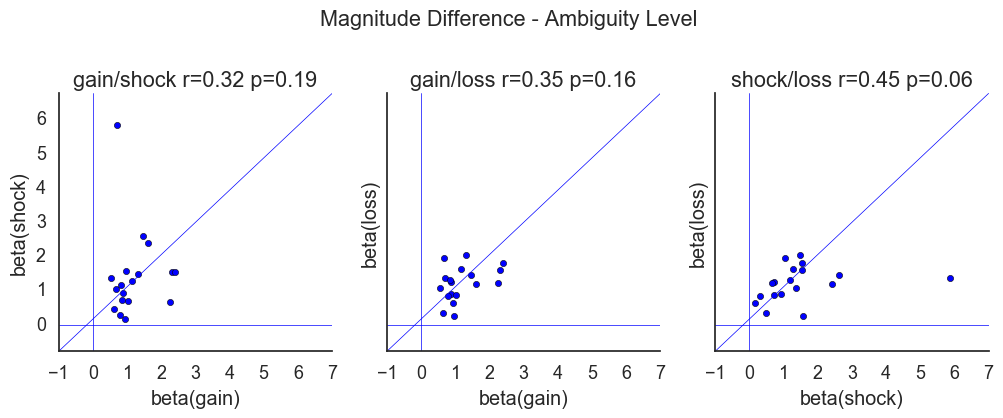

In [80]:
plotTriplet(triplet_ap_magdiff, 'Magnitude Difference - Ambiguity Presence')
f = plotTriplet(triplet_al_magdiff, 'Magnitude Difference - Ambiguity Level')

### Probability Difference

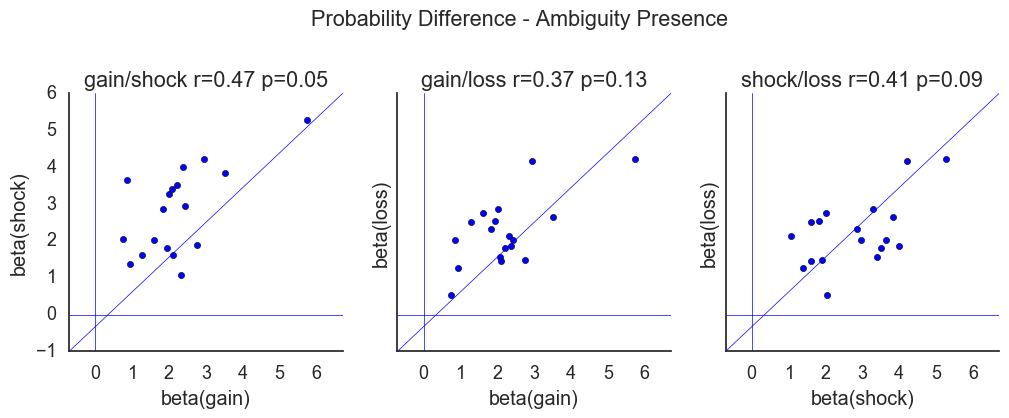

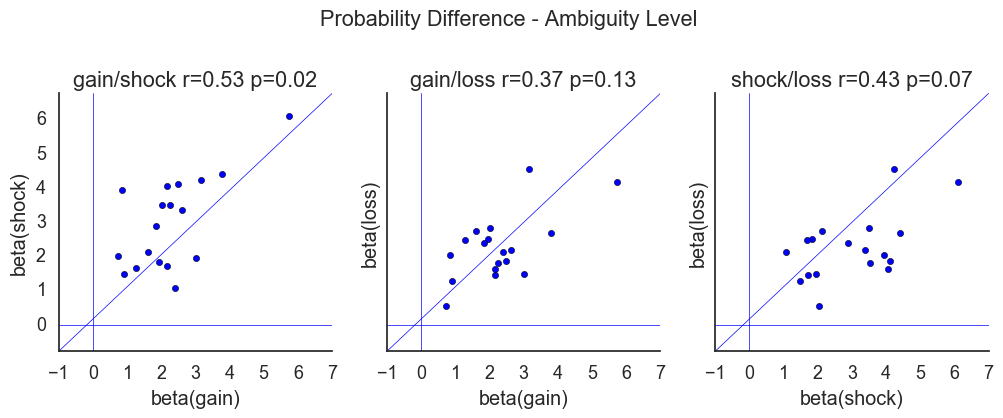

In [81]:
plotTriplet(triplet_ap_probdiff, 'Probability Difference - Ambiguity Presence')
f = plotTriplet(triplet_al_probdiff, 'Probability Difference - Ambiguity Level')

### Ambiguity

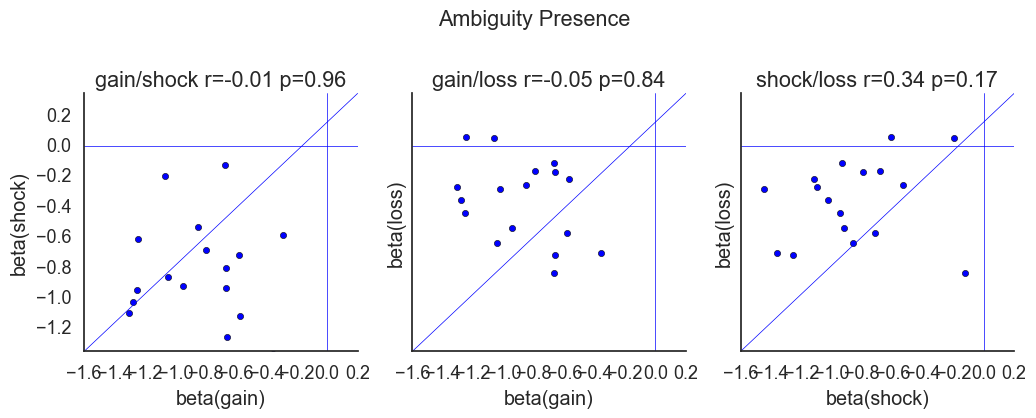

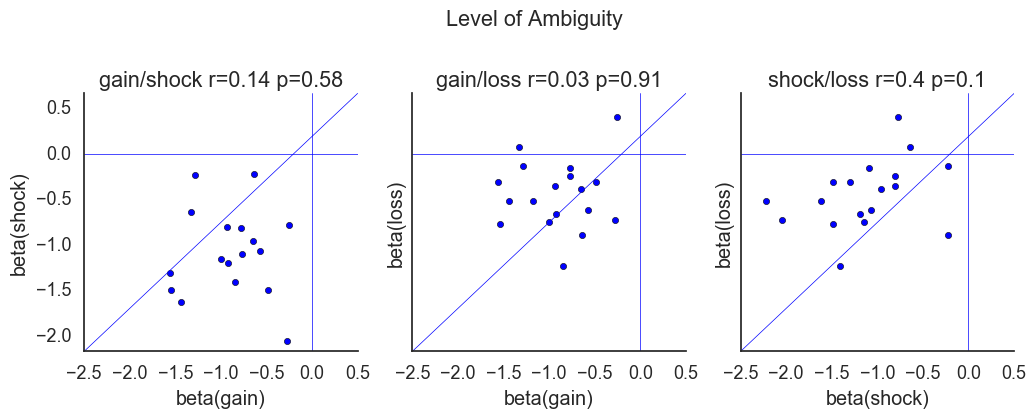

In [82]:
plotTriplet(triplet_ap_ambipresent, 'Ambiguity Presence')
f=plotTriplet(triplet_al_ambiLevel, 'Level of Ambiguity')